# Tarea pytorch, parte B

Recuerda que no se vale utilizar la palabra `for`.


1. Carga una imagen y muéstrala cortada a la mitad horizontalmente, dejando la parte de arriba. **HECHO**
3. Muestra la imagen cortada a la mitad verticalmente, dejando la parte derecha. **HECHO**
4. Llena la mitad de la imagen diagonalmente (tú escoge la diagonal) con negro y muestra la imagen. **HECHO**
5. Convierte la imagen a escala de grises (directo con pytorch, obviamente) **HECHO**
6. Encuentra el **color promedio** de la imagen. **HECHO**
7. Para cada pixel, pon como 0 aquellos valores que estén debajo del promedio (de su propio color). **HECHO**
8. Todos los pixeles que sean mayormente azules conviértelos a blanco y negro. Los pixeles mayormente rojos o verdes déjalos como están. **HECHO**
9. Crea una imagen que parezca un tablero de ajedrez. **HECHO**
10. Crea una imagen que parezca ruido de televisión (e.g. aleatorio pero en escala de grises) **HECHO**
11. Crea una imagen que parezca una gradiente horizontal y luego una gradiente vertical. **HECHO**

En todos los siguientes ejercicios, encuentra soluciones aproximadas!

11. Encuentra un mínimo local de $\cos(x)$. **HECHO**
13. Encuentra una raíz de $\sin(x+1) + x\cos(2x^2)$ **HECHO**
14. Encuentra una raiz de $\sin(x) + \cos(y+1)$ que satisfaga $\sqrt{|x|} + \log(1+|y|) = 2$.

In [163]:
import torchvision as tv
from PIL import Image

#1. Carga una imagen y muéstrala cortada a la mitad horizontalmente, dejando la parte de arriba.

In [164]:
I = Image.open("/content/dragon.jpg")

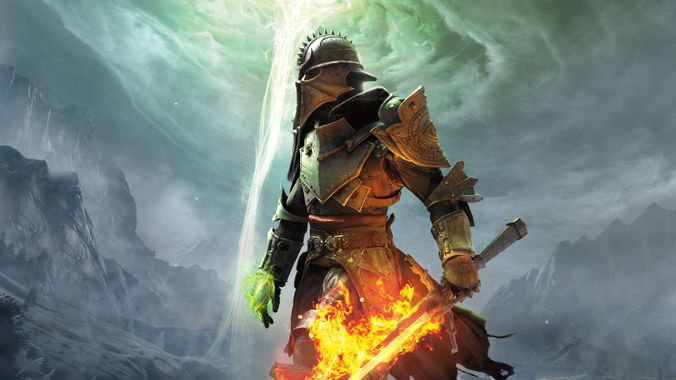

In [165]:
I

In [166]:
to_tensor = tv.transforms.ToTensor() 
X = to_tensor(I) #Transformamos nuestra imagen a tensor 
X

tensor([[[0.3961, 0.3961, 0.3961,  ..., 0.3608, 0.3608, 0.3647],
         [0.3961, 0.3961, 0.3961,  ..., 0.3647, 0.3647, 0.3647],
         [0.3961, 0.3961, 0.3961,  ..., 0.3686, 0.3686, 0.3686],
         ...,
         [0.1176, 0.1216, 0.1216,  ..., 0.3294, 0.3294, 0.3137],
         [0.1098, 0.1137, 0.1176,  ..., 0.3373, 0.3333, 0.3176],
         [0.1059, 0.1098, 0.1137,  ..., 0.3255, 0.3255, 0.3098]],

        [[0.4863, 0.4863, 0.4863,  ..., 0.4431, 0.4431, 0.4471],
         [0.4863, 0.4863, 0.4863,  ..., 0.4471, 0.4471, 0.4471],
         [0.4863, 0.4863, 0.4863,  ..., 0.4471, 0.4471, 0.4471],
         ...,
         [0.1608, 0.1647, 0.1647,  ..., 0.3843, 0.3843, 0.3686],
         [0.1529, 0.1569, 0.1608,  ..., 0.3882, 0.3843, 0.3686],
         [0.1490, 0.1529, 0.1569,  ..., 0.3765, 0.3765, 0.3608]],

        [[0.5098, 0.5098, 0.5098,  ..., 0.4235, 0.4235, 0.4275],
         [0.5098, 0.5098, 0.5098,  ..., 0.4275, 0.4275, 0.4275],
         [0.5098, 0.5098, 0.5098,  ..., 0.4392, 0.4392, 0.

In [167]:
X.shape, X.shape[2]/2

(torch.Size([3, 380, 676]), 338.0)

In [168]:
aux = int(X.shape[1]/2)
new_X_H = X[:, 0:aux, :]
new_X_H

tensor([[[0.3961, 0.3961, 0.3961,  ..., 0.3608, 0.3608, 0.3647],
         [0.3961, 0.3961, 0.3961,  ..., 0.3647, 0.3647, 0.3647],
         [0.3961, 0.3961, 0.3961,  ..., 0.3686, 0.3686, 0.3686],
         ...,
         [0.3451, 0.3373, 0.3294,  ..., 0.6000, 0.5961, 0.5922],
         [0.3490, 0.3412, 0.3294,  ..., 0.5882, 0.5843, 0.5804],
         [0.3529, 0.3412, 0.3294,  ..., 0.5725, 0.5725, 0.5686]],

        [[0.4863, 0.4863, 0.4863,  ..., 0.4431, 0.4431, 0.4471],
         [0.4863, 0.4863, 0.4863,  ..., 0.4471, 0.4471, 0.4471],
         [0.4863, 0.4863, 0.4863,  ..., 0.4471, 0.4471, 0.4471],
         ...,
         [0.3961, 0.3882, 0.3804,  ..., 0.6667, 0.6627, 0.6588],
         [0.4000, 0.3922, 0.3804,  ..., 0.6549, 0.6510, 0.6471],
         [0.4039, 0.3922, 0.3804,  ..., 0.6392, 0.6392, 0.6353]],

        [[0.5098, 0.5098, 0.5098,  ..., 0.4235, 0.4235, 0.4275],
         [0.5098, 0.5098, 0.5098,  ..., 0.4275, 0.4275, 0.4275],
         [0.5098, 0.5098, 0.5098,  ..., 0.4392, 0.4392, 0.

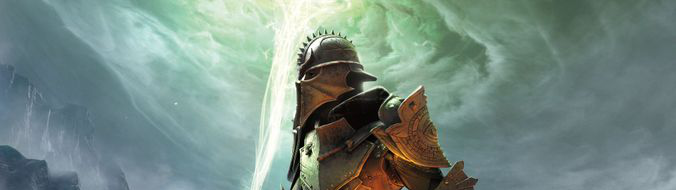

In [169]:
to_image = tv.transforms.ToPILImage()
to_image(new_X_H) # Transformamos la matriz de nuevo a imagen

#2. Muestra la imagen cortada a la mitad verticalmente, dejando la parte derecha.

In [170]:
X.shape

torch.Size([3, 380, 676])

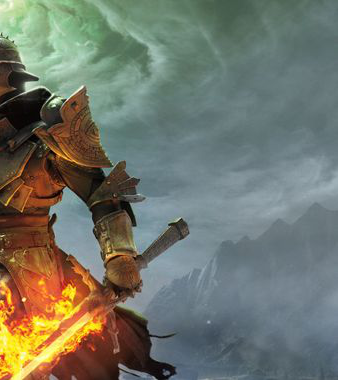

In [171]:
aux1 = int(X.shape[2]/2)
aux2 = int(X.shape[2])
new_X_V = X[:, :, aux1:aux2]
to_image(new_X_V) # Transformamos la matriz de nuevo a imagen

#3. Llena la mitad de la imagen diagonalmente (tú escoge la diagonal) con negro y muestra la imagen.

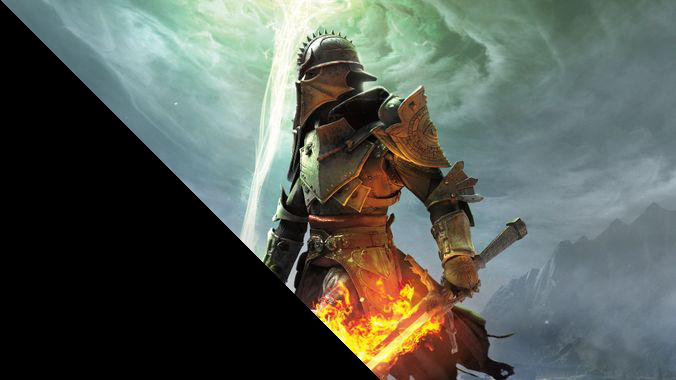

In [172]:
import torch
X = to_tensor(I)
diag_img = torch.triu(X, diagonal=1)
to_image(diag_img)

In [173]:

#3, altura = 380, anchura = 273
# Dado que no tenemos una imagen cuadrada, va a ser necesario 
# convertir la imagen de tal manera que la anchura y la altura sean iguales
# para que sea más sencillo hacer la diagonal
# si la anchura es menor que la altura, ajustamos la altura a la anchura
# caso contrario, igual
to_tensor = tv.transforms.ToTensor() 
#X = to_tensor(I) #Transformamos nuestra imagen a tensor 
X = X[:,:, 0:X.shape[1]]

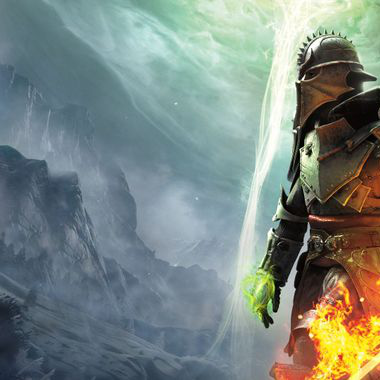

In [174]:
to_image(X)

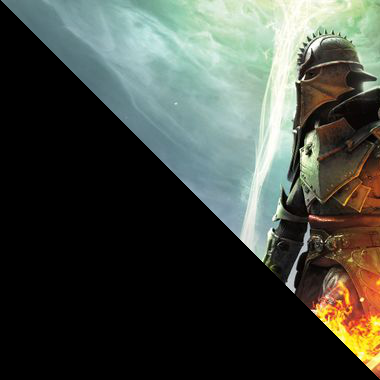

In [175]:
X.shape
diag_img = torch.triu(X, diagonal=1)
to_image(diag_img)

#4. Convierte la imagen a escala de grises (directo con pytorch, obviamente)

In [176]:
gray_img = to_tensor(I)
#gray_img

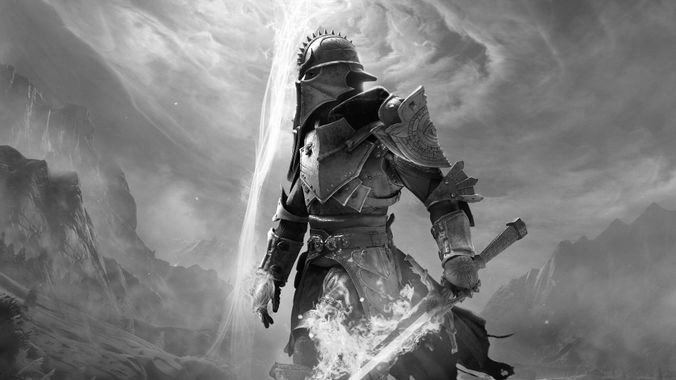

In [177]:
r = gray_img[0, : ,:]; g = gray_img[1, :, :]; b = gray_img[2, : ,:]
gray = (0.299*r) + (0.587*g) + (0.114*b)
#WR=0.299     WG=0.587     WB=0.114
# Donde WR, WG y WB son los coeficientes que definen
# la transformacion, los cuales de acuerdo al criterio utilizado en la TV para señales a color.
# Dichos coeficientes los saque leyendo un blog
# https://pythoneyes.wordpress.com/2017/05/22/conversion-de-imagenes-rgb-a-escala-de-grises/
gray_img[:, : ,:] = gray
to_image(gray_img)

#5. Encuentra el color promedio de la imagen.

In [178]:
my_image = to_tensor(I)

In [179]:
R_prom = my_image[0].mean()
G_prom = my_image[1].mean()
B_prom = my_image[2].mean()
prom = my_image.mean()
print("R: {0} G: {1} B:{2} Promedio Total: {3}".format(R_prom, G_prom, B_prom, prom))

R: 0.45942312479019165 G: 0.500336766242981 B:0.4767049551010132 Promedio Total: 0.47882720828056335


#6. Para cada pixel, pon como 0 aquellos valores que estén debajo del promedio (de su propio color).

In [180]:
# Seleccióón de todos los pixeles
my_image[my_image<R_prom] = 0
my_image[my_image<G_prom] = 0
my_image[my_image<B_prom] = 0

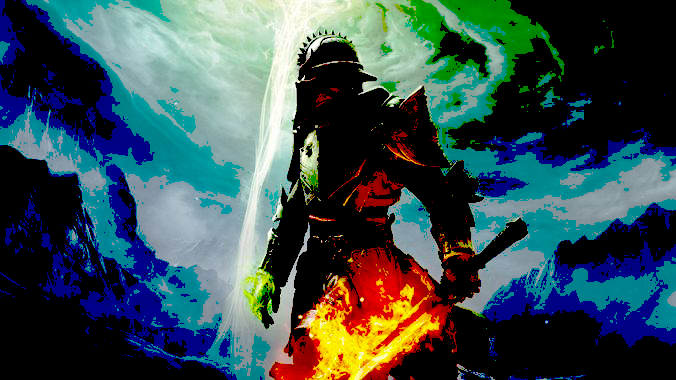

In [181]:
to_image(my_image)

#7. Todos los pixeles que sean mayormente azules conviértelos a blanco y negro. Los pixeles mayormente rojos o verdes déjalos como están.

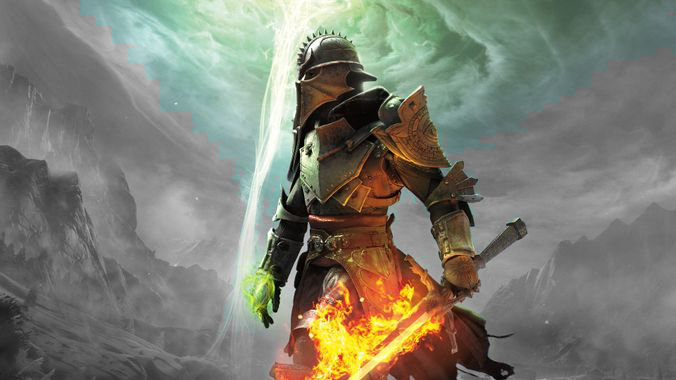

In [182]:
#Estoy usando una variable diferente en cada problema para mi imagen original I 
image7 = to_tensor(I)

#image7_aux = torch.randint(0,2,(image7.shape[1],image7.shape[2])); image7_aux = image7_aux.float()

image7 = torch.where((image7[2]>image7[1]) & (image7[2]>image7[0]), gray_img, image7) #gray_img es la imagen 
#en escala de grises obtenida en uno de los ejercicios anteriores

#No sabia si la comparación era total o por capaz por lo que he dejado la total pero si es 
#por capaz, basta con cometar la línea 5 (la línea de cóódigo anterior) y descomentar
# las tres siguientes

#image7[0] = torch.where((image7[0]>image7[1]) & (image7[0]>image7[2]), image7[0], gray_img[0]) #R 
#image7[1] = torch.where((image7[1]>image7[0]) & (image7[1]>image7[2]), image7[1], gray_img[1]) #G
#image7[2] = torch.where((image7[2]>image7[0]) & (image7[2]>image7[1]), gray_img[2], image7[2]) #B

to_image(image7) 

#8. Crea una imagen que parezca un tablero de ajedrez.

In [183]:
ajedrez = torch.arange(2); ajedrez = ajedrez.float()
ajedrez[ajedrez%2==0] = 0; ajedrez[ajedrez%2==1] = 1

ajedrez2 = torch.arange(2); ajedrez2 = ajedrez2.float()
ajedrez2[ajedrez2%2==0] = 1; ajedrez2[ajedrez%2==1] = 0

ajedrez_table = torch.stack((ajedrez,ajedrez2))

ajedrez_table = ajedrez_table.repeat(4,4)
ajedrez_table

tensor([[0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.]])

In [184]:
table = torch.repeat_interleave(ajedrez_table, 15, dim=0)
table = torch.repeat_interleave(table, 15, dim=1)
table.shape

torch.Size([120, 120])

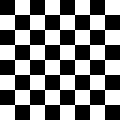

In [185]:
#table = to_image(ajedrez_table)
to_image(table)

#9. Crea una imagen que parezca ruido de televisión (e.g. aleatorio pero en escala de grises)

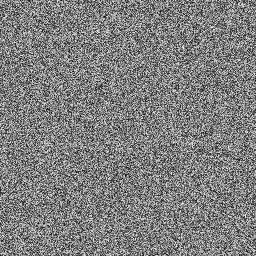

In [186]:
tmp_tv = torch.rand(3,256,256) 
r = tmp_tv[0, : ,:]; g = tmp_tv[1, :, :]; b = tmp_tv[2, : ,:]
final_tv = (0.299*r) + (0.587*g) + (0.114*b)
to_image(final_tv)

#10. Crea una imagen que parezca una gradiente horizontal y luego una gradiente vertical.

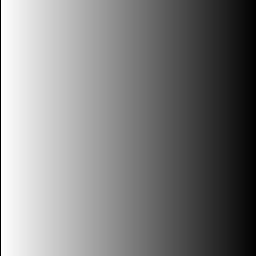

In [187]:
# Gradiente horizontal
imgh = torch.arange(0, 256); imgh = imgh.float()
img = torch.stack((imgh,imgh))
img_f_h = img.repeat(256,1)
to_image(img_f_h[0:256,0:256])
#img_f_h.shape

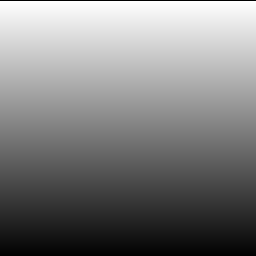

In [188]:
# Gradiente vertical
imgv = torch.arange(0, 512); imgv = imgv.float()
imgv = imgv.unsqueeze(1)
imgv = imgv.T
#img = torch.stack((imgv,imgv))
img_f_v = imgv.T.repeat(1,256)
to_image(img_f_v[0:256,0:256])
#img_f_v.shape

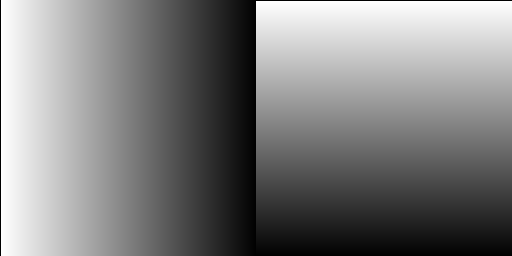

In [189]:
# Por si acaso
img_f_hv = torch.cat((img_f_h, img_f_v), dim=1)
img_f_hv = img_f_hv[0:256, :]
to_image(img_f_hv)
# La verdad no me quedo muy claro el problema, sobre si querian 
# imagenes separadas o todo en una
# por lo tanto lo hice separadas y juntas también
# la cuestión es que no sé si al juntarlos lo querian así, una contigua de otra
# o una sobre otra 
# siendo el caso, basta con hacer un cat con dimensióón 0 y ajustar 
# las dimensiones

#11. Encuentra un mínimo local de $\cos(x)$.

In [190]:
import math
from torch import optim
from tqdm import tqdm
def f(x):
  result = torch.cos(x)
  return(result)

In [191]:

#x = torch.randint(0,10,(1,1)); x = x.float()
x = torch.rand(1,1)
# Marcamos que es necesario que se acuerde 
# de las derivadas
x.requires_grad_(True)
x

tensor([[0.7108]], requires_grad=True)

In [192]:
# Creamos un optimizador
optimizer = optim.SGD([x], lr=0.01)

num_steps = 1000
for step in tqdm(range(num_steps)): 
  optimizer.zero_grad() 
  loss = f(x)
  loss.backward()
  optimizer.step()
print("\nresult: ", x)

# Recordemos que para que sea minimo local ha de cumplirse: 
# f'(a) = 0
# f''(a) > 0

100%|██████████| 1000/1000 [00:00<00:00, 18393.97it/s]


result:  tensor([[3.1414]], requires_grad=True)


#12. Encuentra una raíz de sin(x+1)+xcos(2x2)

In [193]:
def f(x): 
  result = torch.sin(x+1)+x*torch.cos(2*(x**2))
  return(result)

In [194]:
def optimize(num_steps = 25000, lr = 0.0001, initial = None):
  x = torch.randn(1) if initial is None else initial
  x.requires_grad_(True)
  optimizer = optim.SGD([x], lr = lr, momentum=0.9)
  for step in tqdm(range(num_steps)):
    optimizer.zero_grad()
    loss = f(x)
    if loss <= 0.001 and loss >= -0.001:
      print("\nRaiz! Acabas de cruzar exactamente en x: ",x)
      return(x)
      break
    loss.backward()
    optimizer.step()
  return (x)

In [195]:
#x = torch.randint(0,10,(1,1)); x = x.float()
x = torch.rand(1,1)
x.requires_grad_(True)
x

tensor([[0.8794]], requires_grad=True)

In [196]:
exs = optimize(initial=x)
print(exs)

100%|██████████| 25000/25000 [00:04<00:00, 5155.71it/s]

tensor([[1.3011]], requires_grad=True)


#13. Encuentra una raiz de sin(x)+cos(y+1) que satisfaga √|x|+log(1+|y|)=2.

In [197]:
def f(x):
  result = torch.sin(x)+torch.cos(y+1)
  return(result)

In [198]:
def optimize(f, num_steps = 20000, lr = 0.00001, initial = None):
  x = torch.randn(1) if initial is None else initial
  x.requires_grad_(True)
  optimizer = optim.SGD([x], lr = lr, momentum=0.9)
  for step in tqdm(range(num_steps)):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()
  return f(x), x